# Unit 5 - Financial Planning


In [333]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

# date here
from datetime import date


%matplotlib inline

In [334]:
# Load .env enviroment variables
load_dotenv()

True

## Part 1 - Personal Finance Planner

## Collect Crypto Prices Using the `requests` Library

In [335]:
# Set current amount of crypto assets
# YOUR CODE HERE!
my_btc  =  1.2
my_eth = 5.3

In [336]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=CAD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=CAD"

In [337]:
# response_data = requests.get(create_deck_url).json()
# response_data
btc_resp = requests.get(btc_url).json()
btc_price = btc_resp['data']['1']['quotes']['USD']['price']
my_btc_value =my_btc * btc_price

eth_resp =  requests.get(eth_url).json()
eth_price = eth_resp['data']['1027']['quotes']['USD']['price']
my_eth_value = my_eth * eth_price

print(f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f}")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:0.2f}")

The current value of your 1.2 BTC is $60145.20
The current value of your 5.3 ETH is $11919.81


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [338]:
# Current amount of shares
# Create two variables named my_agg and my_spy and set them equal to 200 and 50, respectively.
# YOUR CODE HERE!
my_agg = 200
my_spy = 50

In [339]:
# Set Alpaca API key and secret
# YOUR CODE HERE!
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

# Create the Alpaca API object
# YOUR CODE HERE!
api = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version = "v2"
)

In [340]:
# Format current date as ISO format
# YOUR CODE HERE!
# use  "2021-04-16" so weekend gives actual data
start_date = pd.Timestamp("2021-04-16", tz="America/New_York").isoformat()
today_date = pd.Timestamp(date.today(), tz="America/New_York").isoformat()

# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to '1D' for Alpaca API
timeframe = "1D"

# Get current closing prices for SPY and AGG
# YOUR CODE HERE!
ticker_data = api.get_barset(
    tickers,
    timeframe,
    start=start_date,
    end=start_date,
).df
# Preview DataFrame
# YOUR CODE HERE!
ticker_data

AGG                                      SPY  \
                             open     high    low   close   volume    open   
time                                                                         
2021-04-16 00:00:00-04:00  114.56  114.665  114.5  114.54  3488514  417.25   

                                                             
                             high     low   close    volume  
time                                                         
2021-04-16 00:00:00-04:00  417.91  415.73  417.31  66624780

In [341]:
# Pick AGG and SPY close prices
# YOUR CODE HERE!
agg_close_price = ticker_data['AGG']['close'][0]
spy_close_price  = ticker_data['SPY']['close'][0]

# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")


Current AGG closing price: $114.54
Current SPY closing price: $417.31


In [342]:
# Compute the current value of shares
# YOUR CODE HERE!
my_spy_value = spy_close_price * my_spy
my_agg_value = agg_close_price * my_agg

# Print current value of share
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")

The current value of your 50 SPY shares is $20865.50
The current value of your 200 AGG shares is $22908.00


### Savings Health Analysis

In [343]:
# Set monthly household income
# YOUR CODE HERE!
monthly_income = 12000

# Create savings DataFrame
# YOUR CODE HERE!
df_savings = pd.DataFrame([my_btc_value+ my_eth_value, my_spy_value + my_agg_value], columns = ['amount'], index = ['crypto', 'shares'])

# Display savings DataFrame
display(df_savings)

,amount
crypto,72065.006
shares,43773.500


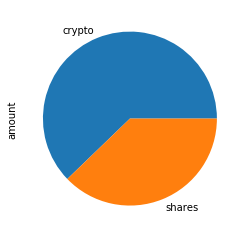

In [344]:
df_savings['amount'].plot.pie(y= ['crypto', 'shares'])
# how to put label

In [345]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3

# Calculate total amount of savings
# YOUR CODE HERE!
total_saving = df_savings['amount'].sum()

# Validate saving health
# YOUR CODE HERE!

#     If total savings are greater than the emergency fund, display a message congratulating the person for having enough money in this fund.
#     If total savings are equal to the emergency fund, display a message congratulating the person on reaching this financial goal.
#     If total savings are less than the emergency fund, display a message showing how many dollars away the person is from reaching the goal.

if total_saving >  emergency_fund:
    print ('Congratulations! You have enough money in your emergency fund.')
elif total_saving == emergency_fund:
    print ('Contratulations you reached your financial goals ')
else:
    print ('You are making great progress. You need to save $ {round((emergency_fund - total_saving), 2)}')

Congratulations! You have enough money in your emergency fund.


## Part 2 - Retirement Planning

### Monte Carlo Simulation

#### Hassan's Note for some reason AlPaca would not let me get more than 1000 records. To get 5 years data (252 * 5), I had to break it up into two reads and concat the data. 

In [346]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date1 = pd.Timestamp('2015-08-07', tz='America/New_York').isoformat()
end_date1 = pd.Timestamp('2017-08-07', tz='America/New_York').isoformat()
start_date2 = pd.Timestamp('2017-08-08', tz='America/New_York').isoformat()
end_date2 = pd.Timestamp('2020-08-07', tz='America/New_York').isoformat()
# end_date1 = pd.Timestamp('2019-08-07', tz='America/New_York').isoformat()
# hits 1000 item limit, have to do in two batches and pringt

In [347]:
# Get 5 years' worth of historical data for SPY and AGG
# create two dataframes and concaternate them 
# first period data frame
df_stock_data1 = api.get_barset(
    tickers,
    timeframe,
    start = start_date1,
    end = end_date1,
    limit = 1000
).df

# second period dataframe 
df_stock_data2 = api.get_barset(
    tickers,
    timeframe,
    start = start_date2,
    end = end_date2,
    limit = 1000
).df

df_stock_data = pd.concat ([df_stock_data1, df_stock_data2], axis = 0, join = 'inner')
print (f'stock data  head: ')
print (df_stock_data.head(5))
print (f'\nstock data 1 tail: ')
print (df_stock_data.tail(5))
# print (f'stock data 1 head: {start_date1}')
# print (df_stock_data1.head(5))
# print (f'\nstock data 1 tail: {end_date1}')
# print (df_stock_data1.tail(5))
# print (f'\nstock data 2 head: {start_date2}')
# print (df_stock_data2.head(5))
# print (f'\nstock data 2 tail: {end_date2}')
# print (df_stock_data2.tail(5))


stock data  head: 
                              AGG                                         SPY  \
                             open      high      low   close   volume    open   
time                                                                            
2015-08-07 00:00:00-04:00  109.14  109.2750  109.035  109.21  2041167  208.16   
2015-08-10 00:00:00-04:00  109.15  109.1700  108.920  109.06  1149778  209.28   
2015-08-11 00:00:00-04:00  109.42  109.5765  109.284  109.42  1420907  208.98   
2015-08-12 00:00:00-04:00  109.55  109.7100  109.350  109.36  1468979  207.11   
2015-08-13 00:00:00-04:00  109.36  109.3651  109.110  109.15  1465173  208.73   

                                                              
                             high     low   close     volume  
time                                                          
2015-08-07 00:00:00-04:00  208.34  206.87  207.93   87669782  
2015-08-10 00:00:00-04:00  210.67  209.28  210.58   66755890  
2015-08-11 00:00:

In [348]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
# YOUR CODE HERE!
MC_even_dist = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.4, .6],
    num_simulation = 500,
    num_trading_days = 252*30
)

In [349]:
# Printing the simulation input data
# YOUR CODE HERE!
MC_even_dist.portfolio_data.head()

AGG                                      \
                             open      high      low   close   volume   
time                                                                    
2015-08-07 00:00:00-04:00  109.14  109.2750  109.035  109.21  2041167   
2015-08-10 00:00:00-04:00  109.15  109.1700  108.920  109.06  1149778   
2015-08-11 00:00:00-04:00  109.42  109.5765  109.284  109.42  1420907   
2015-08-12 00:00:00-04:00  109.55  109.7100  109.350  109.36  1468979   
2015-08-13 00:00:00-04:00  109.36  109.3651  109.110  109.15  1465173   

                                           SPY                          \
                          daily_return    open    high     low   close   
time                                                                     
2015-08-07 00:00:00-04:00          NaN  208.16  208.34  206.87  207.93   
2015-08-10 00:00:00-04:00    -0.001374  209.28  210.67  209.28  210.58   
2015-08-11 00:00:00-04:00     0.003301  208.98  209.47  207.76  208.63   
2015-08-12 00:00:00-04:00    -0.000548  207.11  209.14  205.36  208.89   
2015-08-13 00:00:00-04:00    -0.001920  208.73  209.55  208.01  208.63   

                                                   
                              volume daily_return  
time                                               
2015-08-07 00:00:00-04:00   87669782          NaN  
2015-08-10 00:00:00-04:00   66755890     0.012745  
2015-08-11 00:00:00-04:00   88424557    -0.009260  
2015-08-12 00:00:00-04:00  136171450     0.001246  
2015-08-13 00:00:00-04:00   77197796    -0.001245

In [350]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
# YOUR CODE HERE!
MC_even_dist.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.997803,0.993150,0.993203,0.994088,1.003993,0.999493,0.983952,1.004594,1.013572,0.984767,...,1.001146,0.985908,1.005596,1.013112,1.007820,0.999880,1.014182,0.996352,1.008737,0.995413
2,0.998405,0.992258,0.988010,0.999573,0.998158,0.989574,0.981571,1.011452,1.018127,0.972419,...,1.011274,0.985736,1.012669,1.019296,1.010542,0.997981,1.013122,1.001617,1.007581,1.001748
3,0.994922,0.997612,0.984511,0.979323,0.991694,0.979033,0.979893,1.015344,1.020672,0.976419,...,1.018359,0.993051,1.005107,1.024559,1.011776,0.999946,1.013262,0.998456,1.003585,1.000680
4,0.988064,0.997214,0.984068,0.973879,0.995017,0.979694,0.986510,1.011816,1.028558,0.976125,...,1.019067,0.997991,1.006607,1.025885,1.014878,0.997388,1.013724,1.012864,1.008053,1.011470
5,0.989728,0.997033,0.989502,0.975218,0.994929,0.975011,0.997542,0.998762,1.040827,0.973258,...,1.000710,1.000091,1.008416,1.045431,1.004189,1.008915,1.015000,1.012178,1.021589,1.004520
6,1.017283,0.997339,0.985580,0.972375,0.999738,0.972109,0.997004,0.998724,1.040037,0.980068,...,1.002371,0.993885,1.007020,1.036629,1.003902,0.987647,1.005797,1.010457,1.023150,0.996749
7,1.010647,1.001186,0.981952,0.973679,1.000895,0.968521,0.992639,0.999884,1.055327,0.976242,...,0.996952,0.994891,0.994273,1.051070,0.997430,0.989294,1.005704,1.010437,1.012035,1.003853
8,1.008262,1.003732,0.969291,0.989971,1.001112,0.969147,1.000109,1.007424,1.055777,0.964731,...,1.007414,1.008385,0.995789,1.048861,0.997114,0.988426,1.006366,0.994042,1.016496,0.995833
9,1.008671,0.994923,0.976154,0.994776,0.998383,0.970387,0.995481,1.018108,1.068181,0.956974,...,1.003128,1.004357,0.985524,1.056198,0.980292,1.000989,0.998900,0.978044,1.023814,1.007283


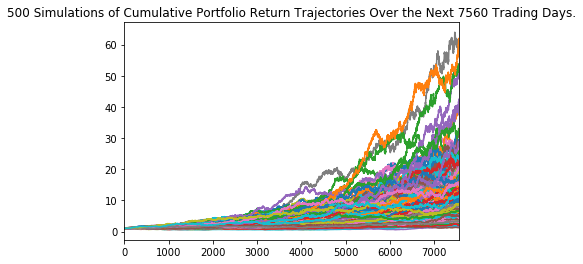

In [351]:
# Plot simulation outcomes
line_plot = MC_even_dist.plot_simulation()

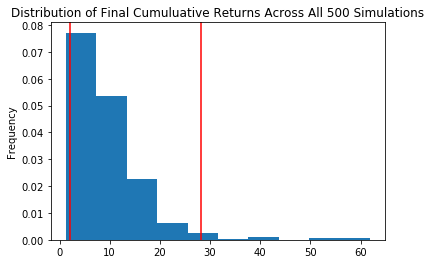

In [352]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!
dist_plot = MC_even_dist.plot_distribution()

### Retirement Analysis

In [353]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!
tbl = MC_even_dist.summarize_cumulative_return()

# Print summary statistics
print (tbl)

count           500.000000
mean              9.693086
std               7.384173
min               1.244934
25%               4.897947
50%               7.577670
75%              12.445747
max              61.901631
95% CI Lower      2.148757
95% CI Upper     28.170747
Name: 7560, dtype: float64


### Calculate the expected portfolio return at the 95% lower and upper confidence intervals based on a `$20,000` initial investment.

In [354]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
# YOUR CODE HERE!
ci_lower = round(tbl[8]*initial_investment,2)
ci_upper = round(tbl[9]*initial_investment,2)


# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $42975.14 and $563414.94


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [355]:
# Set initial investment
initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
# YOUR CODE HERE!
ci_lower = round(tbl[8]*initial_investment,2)
ci_upper = round(tbl[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $64462.72 and $845122.41


## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [356]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
# YOUR CODE HERE!
MC_even_dist = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.4, .6],
    num_simulation = 500,
    num_trading_days = 252*5
)

In [357]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
MC_even_dist.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.005649,1.003998,0.991543,1.001439,1.001968,1.007259,1.000962,1.005686,1.001492,0.994172,...,1.006656,0.994505,1.007983,1.007340,1.012266,1.000361,0.997788,0.990475,1.005805,0.992859
2,1.009273,1.013790,0.997108,1.006325,1.006178,0.993179,0.998764,1.000214,0.993547,0.996763,...,1.010984,0.993158,1.010759,1.012709,1.003394,1.003846,0.999912,1.003527,0.989685,0.994933
3,1.010913,1.010364,0.991179,1.007901,1.014453,0.989965,0.993643,1.000354,1.007338,1.002063,...,1.007561,0.994735,0.999406,1.004686,1.018749,1.003582,0.994515,0.998754,0.998428,0.994083
4,1.013339,1.014278,0.996933,1.000252,1.007308,1.000241,0.978400,1.000670,1.007305,1.008276,...,1.012859,1.003054,0.994647,1.004444,1.015637,0.987999,1.004400,0.992367,1.001146,0.994752
5,1.010724,1.009809,0.980750,1.008138,1.009895,0.997916,0.986391,1.010766,1.007420,1.002791,...,1.013553,1.006447,0.999310,1.010991,1.009610,0.982697,1.007582,1.002916,0.995726,0.993031
6,1.006341,1.007814,0.981791,1.011206,1.012419,0.985385,0.989272,1.028853,1.003040,0.992371,...,1.008685,1.009400,0.992203,1.009974,1.003443,0.982497,1.011911,0.998060,1.007342,0.981638
7,0.998862,1.010692,0.985544,1.012447,0.994679,0.996044,0.994392,1.039005,1.007481,0.998939,...,1.004274,1.021154,0.984836,1.025031,0.999115,0.982972,1.018121,0.985263,0.995750,0.988866
8,0.996619,1.004819,0.998084,1.019544,0.982776,1.004638,1.009554,1.047647,0.994498,1.000065,...,0.996592,1.016897,0.992210,1.026795,0.990496,0.981138,1.013578,0.986954,0.989616,0.973007
9,0.992040,1.014544,1.002290,1.031905,0.985562,0.994500,1.026440,1.039511,0.989533,1.006803,...,1.004435,1.018171,0.988182,1.032117,0.983866,0.985472,1.000984,0.996699,0.990005,0.973974


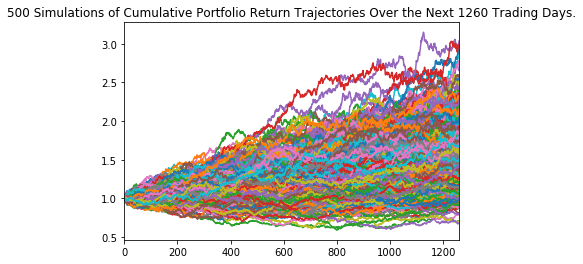

In [358]:
# Plot simulation outcomes
line_plot = MC_even_dist.plot_simulation()

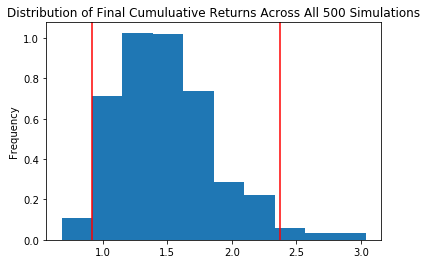

In [359]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!
dist_plot = MC_even_dist.plot_distribution()

In [360]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!
tbl = MC_even_dist.summarize_cumulative_return()

# Print summary statistics
print (tbl)

count           500.000000
mean              1.492676
std               0.392229
min               0.681238
25%               1.203870
50%               1.453849
75%               1.709119
max               3.039725
95% CI Lower      0.916593
95% CI Upper      2.376551
Name: 1260, dtype: float64


In [361]:
# Set initial investment
# YOUR CODE HERE!
initial_investment = 60000
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
# YOUR CODE HERE!
ci_lower_five = round(tbl[8]*initial_investment,2)
ci_upper_five = round(tbl[9]*initial_investment,2)
# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_five} and ${ci_upper_five}")

There is a 95% chance that an initial investment of $60000 in the portfolio over the next 5 years will end within in the range of $54995.61 and $142593.08


### Ten Years Retirement Option

In [362]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
# YOUR CODE HERE!
MC_even_dist = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.4, .6],
    num_simulation = 500,
    num_trading_days = 252*10
)

In [363]:
MC_even_dist.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.000401,1.001917,0.991086,1.009304,1.000287,1.001216,0.997889,0.993139,0.998768,1.002075,...,1.006741,1.003771,0.995029,1.008809,1.007673,1.002924,1.001376,0.992541,0.997930,1.000449
2,1.012331,0.998161,1.003677,1.001852,1.000304,1.007780,0.993859,0.999485,0.992233,0.987463,...,1.013134,1.005399,1.001292,1.014986,1.007677,0.995802,0.994696,0.992604,1.010382,0.993809
3,1.027126,1.007035,1.004262,1.001560,0.999195,1.006258,0.987476,1.012158,0.998029,0.985184,...,1.014010,1.009989,0.984334,1.004864,1.004968,1.010444,0.990463,0.996102,1.007352,0.998315
4,1.018038,1.006739,1.009270,1.007474,0.995839,1.003335,0.994684,1.016245,0.998598,0.983332,...,1.013955,1.015757,0.986982,1.009754,1.000902,1.001538,0.989108,1.015036,1.012634,0.986637
5,1.022392,1.008153,1.001373,1.001202,0.998716,0.986512,0.987777,1.028308,1.008462,0.974157,...,1.006105,1.016963,0.982372,1.007740,1.006672,1.008357,0.990157,1.016091,1.011214,0.991306
6,1.030077,1.004397,1.010338,0.995389,0.987197,0.990660,0.969262,1.026045,1.006236,0.970695,...,1.012812,1.021445,0.991925,1.017805,1.011195,1.006910,0.992062,1.007121,1.005675,0.987495
7,1.037007,1.005141,1.029115,0.994908,0.985975,0.986843,0.963466,1.022412,1.008968,0.954725,...,1.012904,1.008961,1.000049,1.012474,1.005675,1.009249,1.007232,1.013298,0.996878,0.994611
8,1.028314,1.001167,1.033870,0.989320,0.988865,0.988623,0.966920,1.020569,0.998812,0.967996,...,1.014226,1.015262,1.005458,1.017755,1.010710,1.001323,1.002022,1.003210,0.997041,0.990602
9,1.023557,0.996877,1.048411,0.996343,0.994884,0.991185,0.969081,1.025639,0.994400,0.968708,...,1.008539,1.017182,1.012087,1.025625,1.008984,1.007524,1.016376,1.000463,0.985985,0.994341


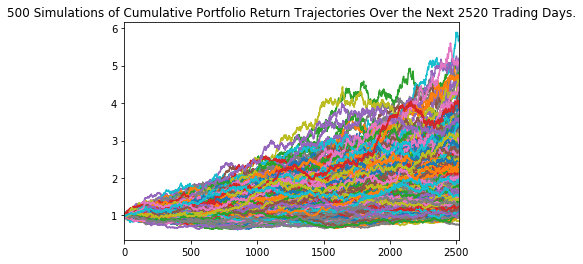

In [364]:
# Plot simulation outcomes
line_plot = MC_even_dist.plot_simulation()

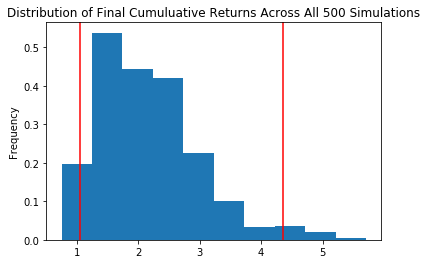

In [365]:
# Plot probability distribution and confidence intervals
dist_plot = MC_even_dist.plot_distribution()

In [366]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!
tbl = MC_even_dist.summarize_cumulative_return()

# Print summary statistics
print (tbl)

count           500.000000
mean              2.162544
std               0.819108
min               0.754140
25%               1.553305
50%               1.992783
75%               2.604890
max               5.702919
95% CI Lower      1.045766
95% CI Upper      4.353337
Name: 2520, dtype: float64


In [367]:
# Set initial investment
# YOUR CODE HERE!

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
# YOUR CODE HERE!

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_ten} and ${ci_upper_ten}")

There is a 95% chance that an initial investment of $60000 in the portfolio over the next 10 years will end within in the range of $59207.78 and $236932.85


In [368]:
# Set initial investment
# YOUR CODE HERE!
initial_investment = 60000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
# YOUR CODE HERE!
ci_lower_ten = round(tbl[8]*initial_investment,2)
ci_upper_ten = round(tbl[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_ten} and ${ci_upper_ten}")

There is a 95% chance that an initial investment of $60000 in the portfolio over the next 10 years will end within in the range of $62745.94 and $261200.21
